In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# Задание №1

Данная задача относится к бинарной классификации, так как целевая переменная (Target) имеет два возможных значения:

1 — заемщик имел просрочку платежа на 90 дней или хуже ("Будет испытывать финансовые трудности").

0 — заемщик не имел таких просрочек ("Не будет испытывать финансовые трудности").


# Задание №2

## Подготовка данных

In [ ]:
df_test = pd.read_excel('test.xlsx')
df_train = pd.read_excel('train.xlsx')
print("Test data loaded:", df_test.shape)
print("Train data loaded:", df_train.shape)

Test data loaded: (19998, 10)
Train data loaded: (100001, 12)


In [ ]:
#Проверка типов данных
print(df_train.dtypes)

Unnamed: 0                          int64
Age                                 int64
FamilySize                        float64
PastDueLess_60                      int64
PastDue60_90                        int64
PastDue90_More                      int64
DebtRatio                          object
MonthlyIncome                     float64
TotalBalanceDivideCreditLimits    float64
OpenLoans                           int64
RealEstateLoans                     int64
Target                              int64
dtype: object


In [ ]:
df_train['DebtRatio'] = pd.to_numeric(df_train['DebtRatio'], errors='coerce').fillna(0)
df_train['FamilySize'] = df_train['FamilySize'].fillna(0).astype(int)

In [ ]:
print(df_train.dtypes)

Unnamed: 0                          int64
Age                                 int64
FamilySize                          int64
PastDueLess_60                      int64
PastDue60_90                        int64
PastDue90_More                      int64
DebtRatio                         float64
MonthlyIncome                     float64
TotalBalanceDivideCreditLimits    float64
OpenLoans                           int64
RealEstateLoans                     int64
Target                              int64
dtype: object


In [ ]:
df_train.nunique()#Проверка уникальных значений

,0
Unnamed: 0,100001
Age,85
FamilySize,13
PastDueLess_60,15
PastDue60_90,13
PastDue90_More,18
DebtRatio,78949
MonthlyIncome,11897
TotalBalanceDivideCreditLimits,84410
OpenLoans,57


In [ ]:
df_train.drop(columns='Unnamed: 0',inplace=True)#Удаление ненужного столбца

In [ ]:
df_train.duplicated().sum()

np.int64(414)

In [ ]:
df_train.drop_duplicates(inplace=True)#Поиск и удаление дубликатов

In [ ]:
#Aнализ пропущенных значений
df_train_missing = pd.DataFrame({'total_missing': df_train.isnull().sum(), 'perc_missing': (df_train.isnull().sum()/df_train.shape[0])*100})
df_train_missing

,total_missing,perc_missing
Age,0,0.000000
FamilySize,0,0.000000
PastDueLess_60,0,0.000000
PastDue60_90,0,0.000000
PastDue90_More,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,19379,19.459367
TotalBalanceDivideCreditLimits,0,0.000000
OpenLoans,0,0.000000
RealEstateLoans,0,0.000000


In [ ]:
#Заменили значения равные нулю на NaN, а после чего в следущем шаге заполняем медианой
df_train['MonthlyIncome'] = df_train['MonthlyIncome'].replace(0, np.nan)
df_train['MonthlyIncome'] = df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median())

In [ ]:
# Заполнение пропусков
df_train['MonthlyIncome'] = df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].median())
df_train['FamilySize'] = df_train['FamilySize'].fillna(df_train['FamilySize'].mode()[0])

In [ ]:
print("Пропуски после обработки:", df_train.isnull().sum().sum())

Пропуски после обработки: 0


# Задание 3

## Разведывательный анализ

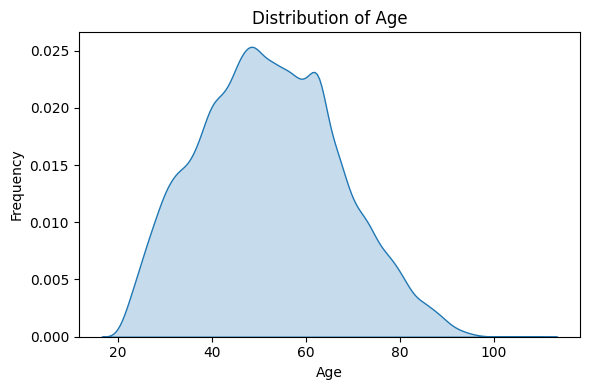

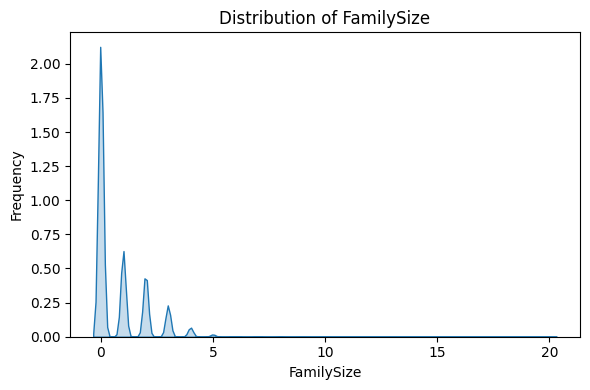

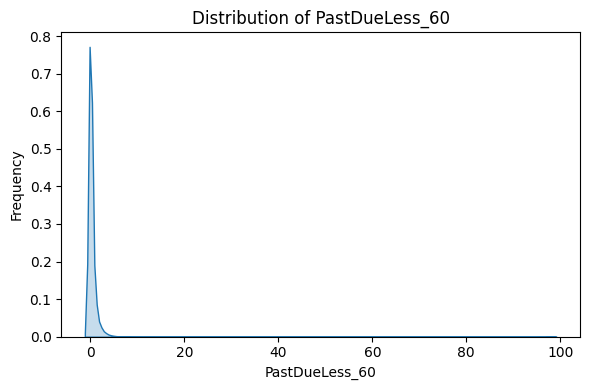

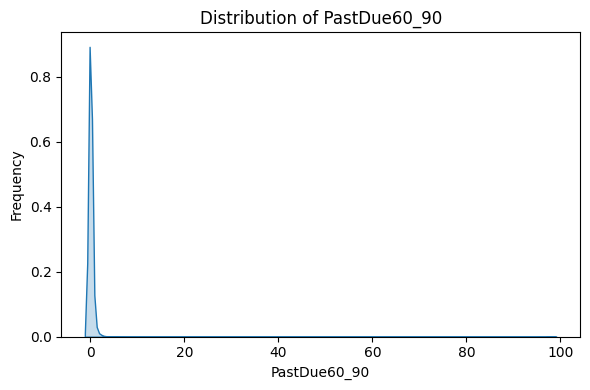

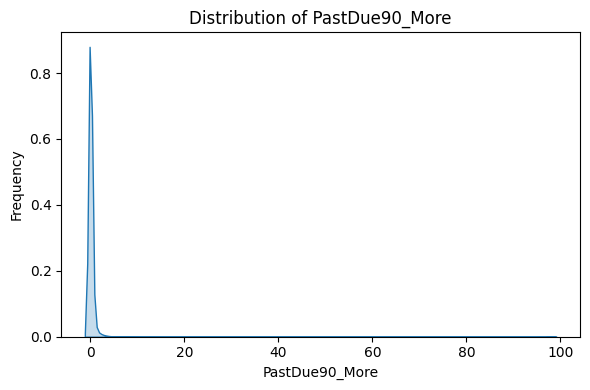

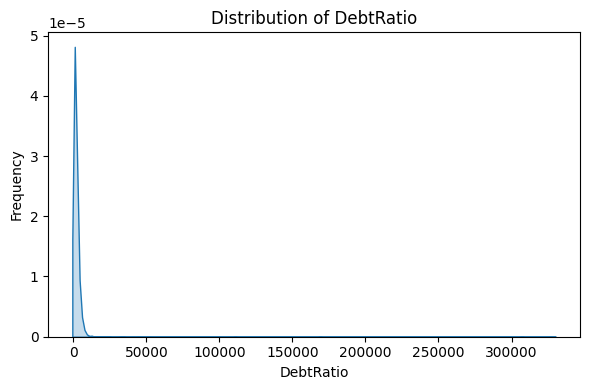

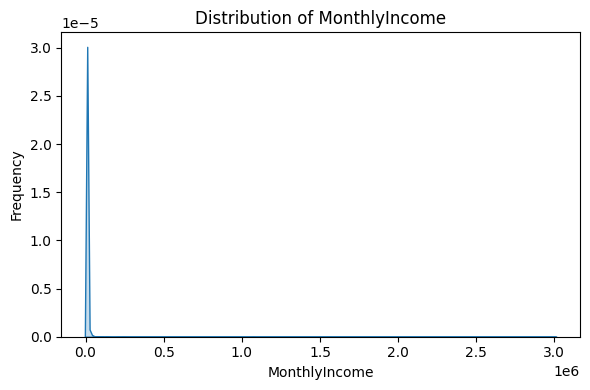

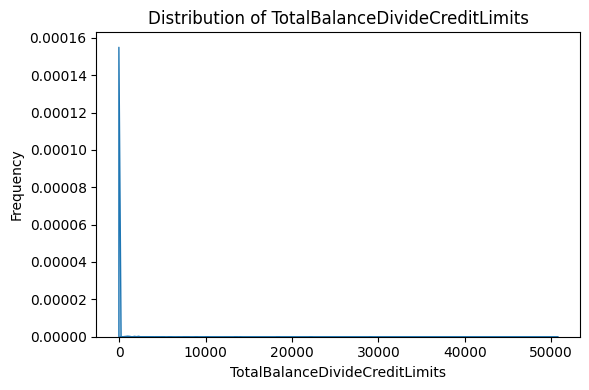

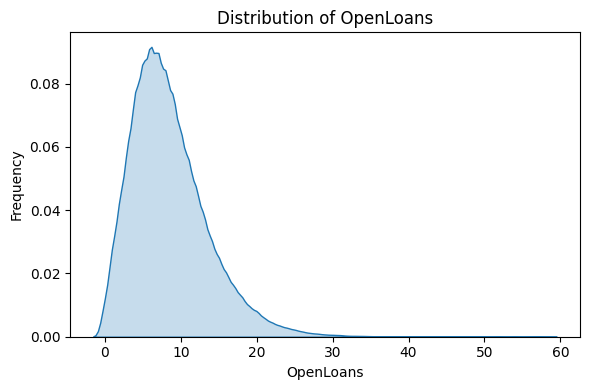

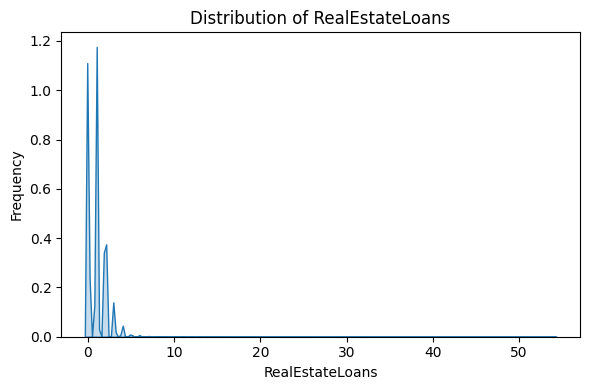

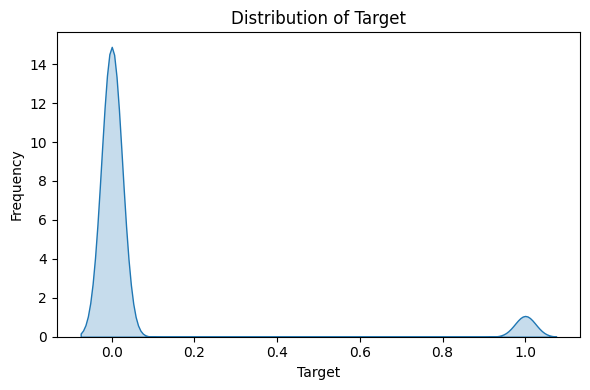

In [ ]:
numerical_columns = df_train.select_dtypes(include=['number']).columns

# Создание гистограмм для числовых столбцов
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df_train, x=col, fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

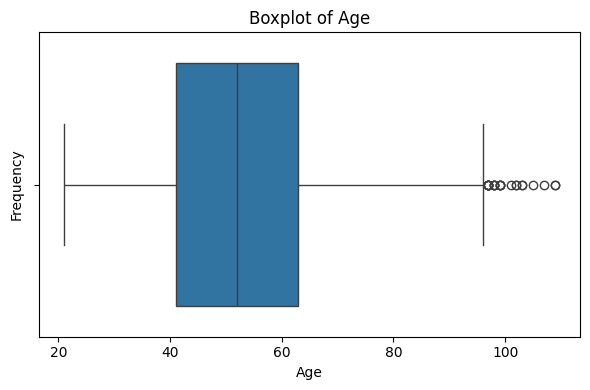

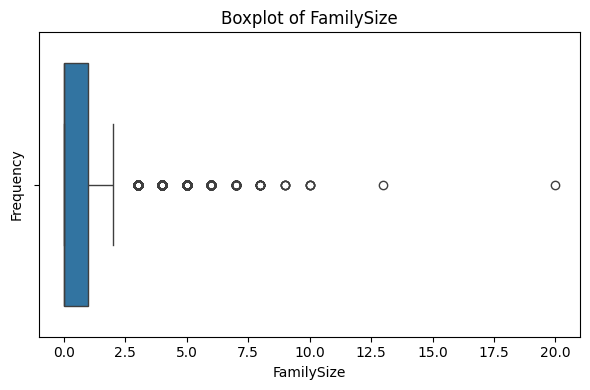

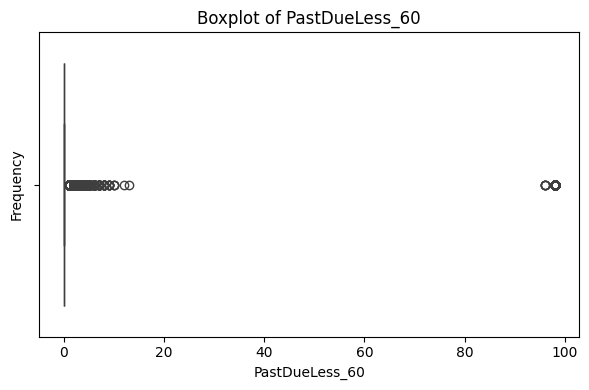

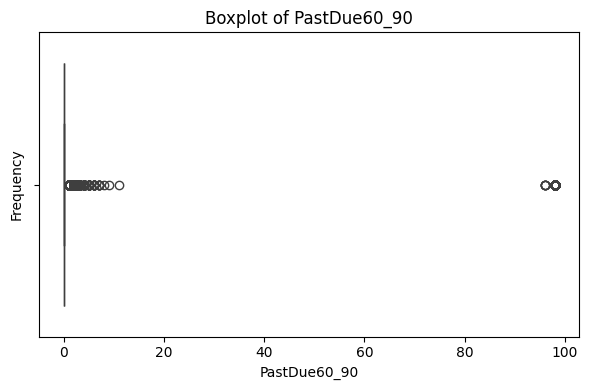

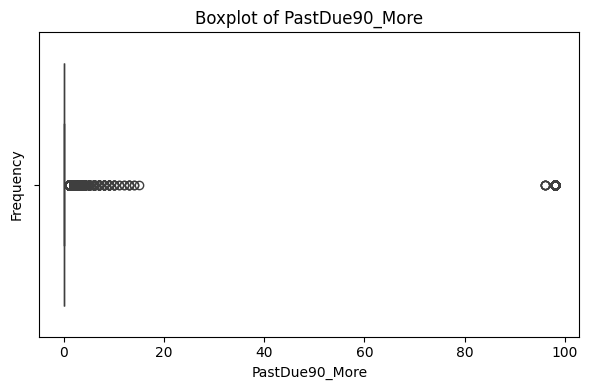

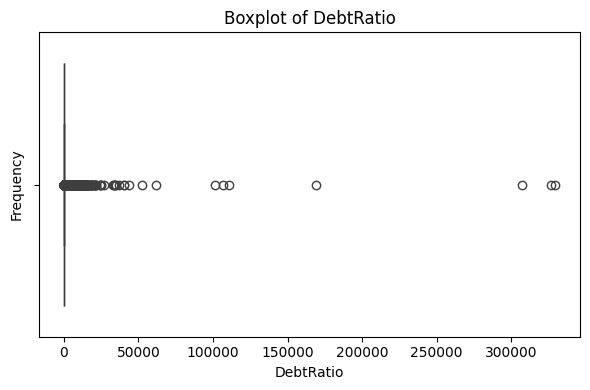

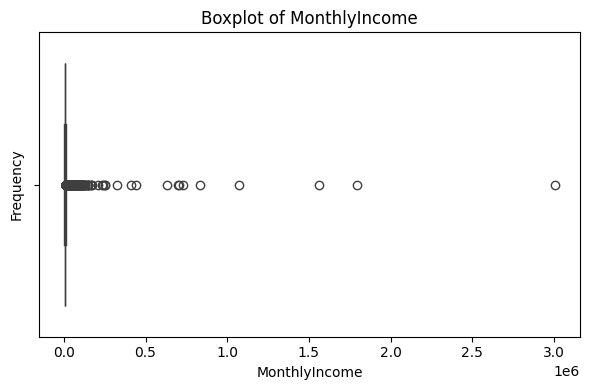

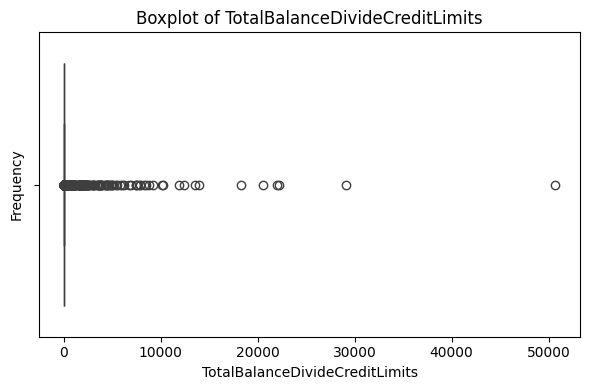

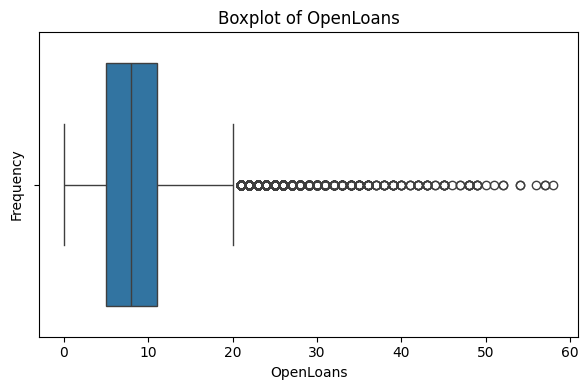

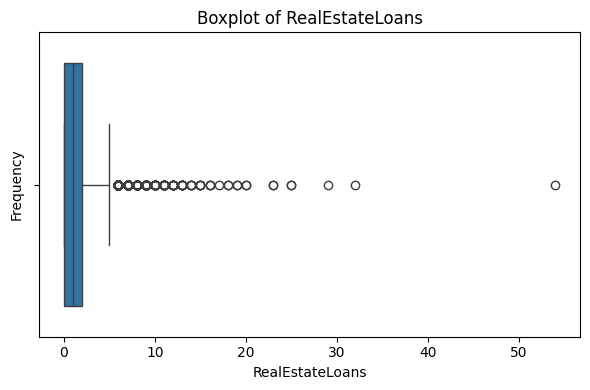

In [ ]:
numerical_columns = ['Age', 'FamilySize', 'PastDueLess_60', 'PastDue60_90', 'PastDue90_More', 'DebtRatio', 'MonthlyIncome', 'TotalBalanceDivideCreditLimits', 'OpenLoans', 'RealEstateLoans']

# Создание гистограмм для числовых столбцов
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_train, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

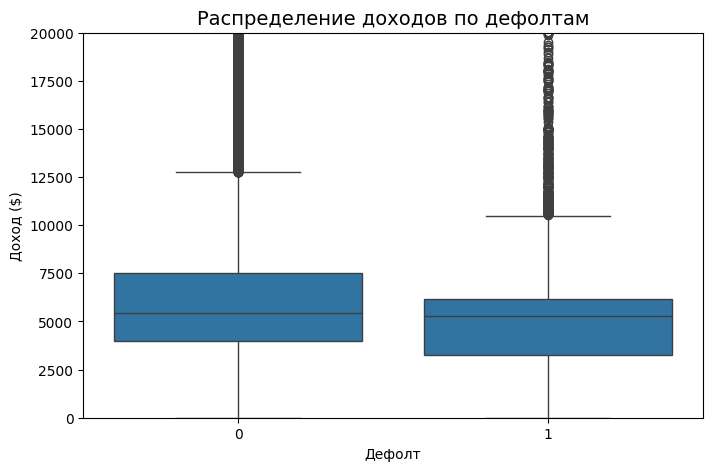

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train, x='Target', y='MonthlyIncome')
plt.ylim(0, 20000)
plt.title('Распределение доходов по дефолтам', fontsize=14)
plt.xlabel('Дефолт')
plt.ylabel('Доход ($)')
plt.show()

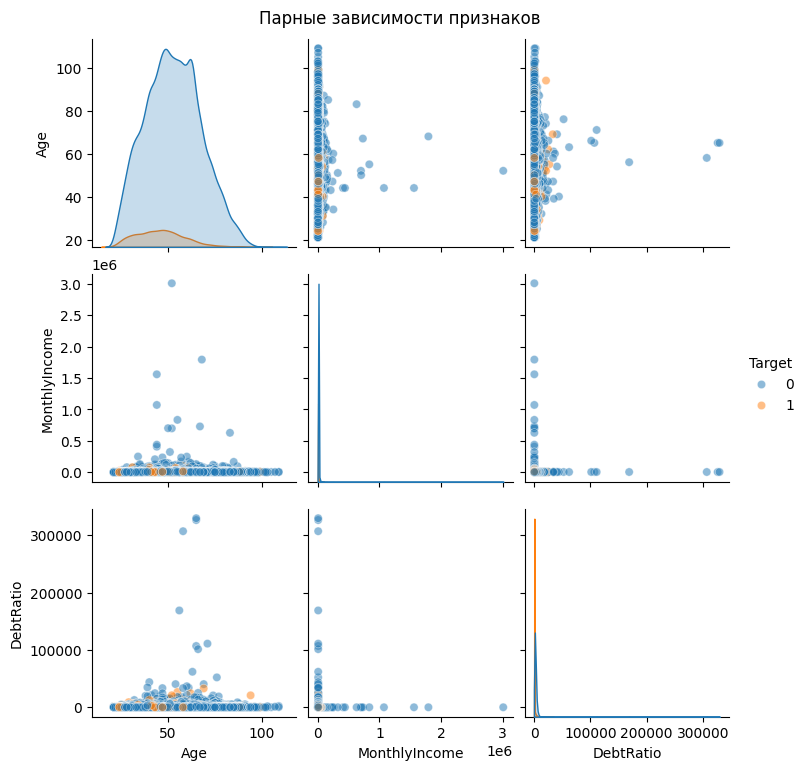

In [ ]:
sns.pairplot(df_train[['Age', 'MonthlyIncome', 'DebtRatio', 'Target']],
             hue='Target', plot_kws={'alpha':0.5})
plt.suptitle('Парные зависимости признаков', y=1.02)
plt.show()

<ipython-input-18-eb3daae9bfd6>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')


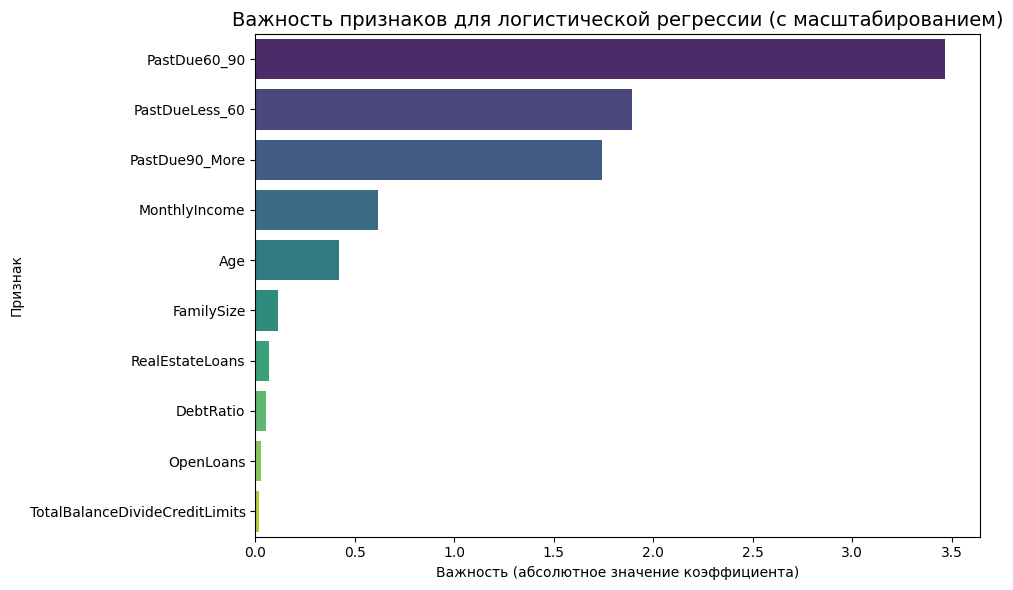

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных (предполагается, что df_train уже существует)
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Создание DataFrame с важностью признаков
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])  # Берем абсолютные значения коэффициентов
}).sort_values('Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10,6))
sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')
plt.title('Важность признаков для логистической регрессии (с масштабированием)', fontsize=14)
plt.xlabel('Важность (абсолютное значение коэффициента)')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df_train, x="Target", title="Distribution of Target", color="Target")
fig.update_layout(bargap=0.2, title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
# Calculate the overall default rate
total_borrowers = len(df_train)
default_borrowers = len(df_train[df_train['Target'] == 1])
default_rate = (default_borrowers / total_borrowers) * 100
print(f"The overall default rate in the dataset is: {default_rate:.2f}%")

The overall default rate in the dataset is: 6.69%


In [ ]:
defaulted = df_train['Target'].value_counts()
defaulted

,count
Target,
0,92926
1,6661


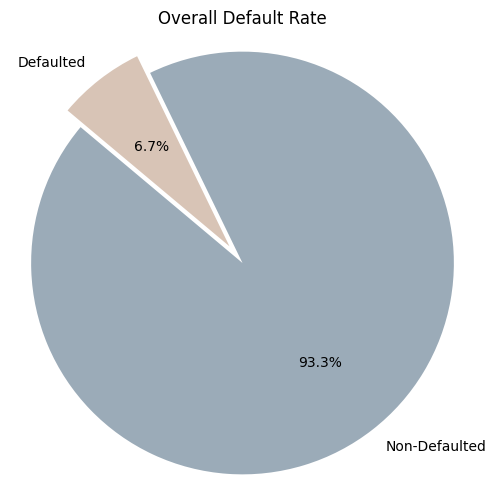

In [ ]:
# Create a pie chart
labels = ['Non-Defaulted', 'Defaulted']
sizes = [100 - default_rate, default_rate]
explode = (0, 0.1)  # To explode the 'Defaulted' slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels,colors=['#9BABB8','#D8C4B6'], autopct='%1.1f%%' , startangle=140)
plt.title('Overall Default Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

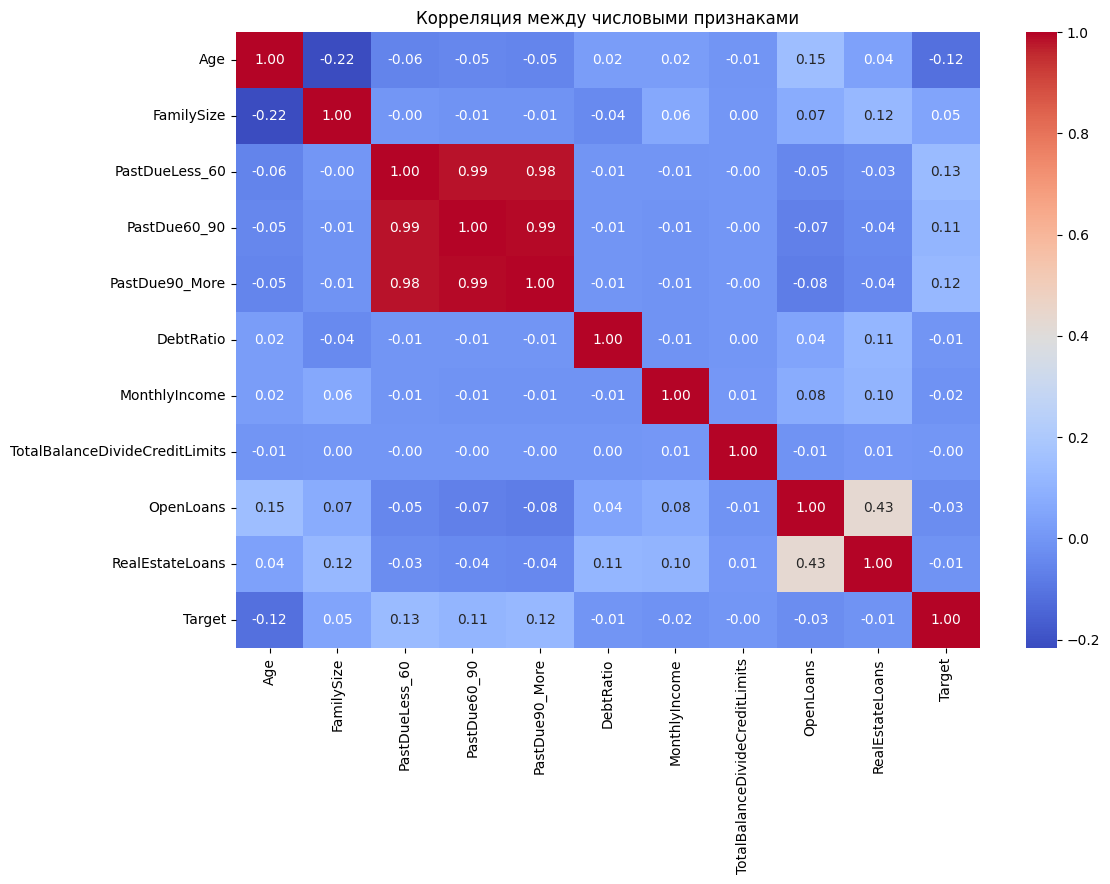

In [ ]:
plt.figure(figsize=(12, 8))
corr = df_train.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция между числовыми признаками")
plt.show()

In [ ]:
# Define custom age bins
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100,110]

# Categorize age into custom bins
df_train['age_group'] = pd.cut(df_train['Age'], bins=age_bins)

# Filter the dataset to include only defaulted borrowers (SeriousDlqin2yrs == 1)
defaulted_borrowers = df_train[df_train['Target'] == 1]

# Convert the 'age_group' Interval objects to strings
defaulted_borrowers['age_group'] = defaulted_borrowers['age_group'].astype(str)

# Count the defaulted borrowers in each age group
age_range_counts = defaulted_borrowers['age_group'].value_counts().reset_index()
age_range_counts.columns = ['Age Range', 'Count']
age_range_counts

<ipython-input-24-58fd8cdf95b6>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age Range,Count
0,"(40, 50]",1942
1,"(30, 40]",1585
2,"(50, 60]",1414
3,"(20, 30]",824
4,"(60, 70]",636
5,"(70, 80]",195
6,"(80, 90]",61
7,"(90, 100]",4


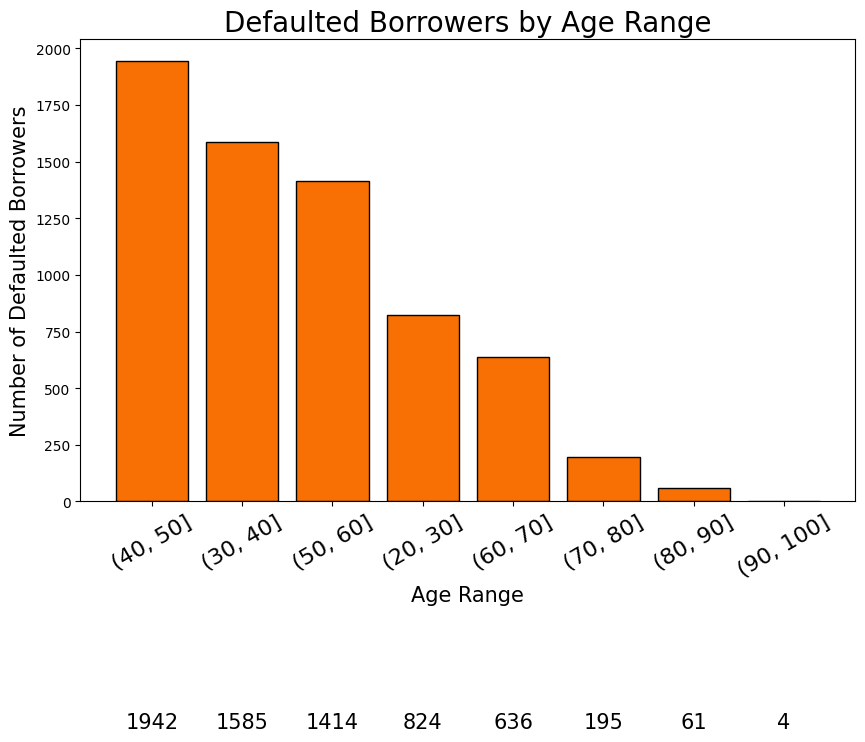

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_range_counts['Age Range'], age_range_counts['Count'],color='#F86F03',edgecolor="k",linewidth=1)
plt.xlabel('Age Range',fontsize=15)
plt.ylabel('Number of Defaulted Borrowers',fontsize=15)
plt.title('Defaulted Borrowers by Age Range',fontsize=20)
plt.xticks(fontsize=16,rotation=30)
for k,v in age_range_counts['Count'].items():
    plt.text(k,-1000, str(v), fontsize=15,color='k', horizontalalignment='center')
plt.show()

In [ ]:
# Filter the dataset to include only defaulted borrowers (SeriousDlqin2yrs == 1)
serious_delinquency_30 = df_train[df_train['Target'] == 1]

# Group by the number of dependents and count the defaulted borrowers in each group
probability_by_past_due_30 = serious_delinquency_30['PastDueLess_60'].value_counts().reset_index()
probability_by_past_due_30.columns = ['PastDueLess_60', 'Count']
probability_by_past_due_30

,PastDueLess_60,Count
0,0,3370
1,1,1559
2,2,843
3,3,418
4,4,207
5,5,98
6,98,91
7,6,46
8,7,17
9,96,4


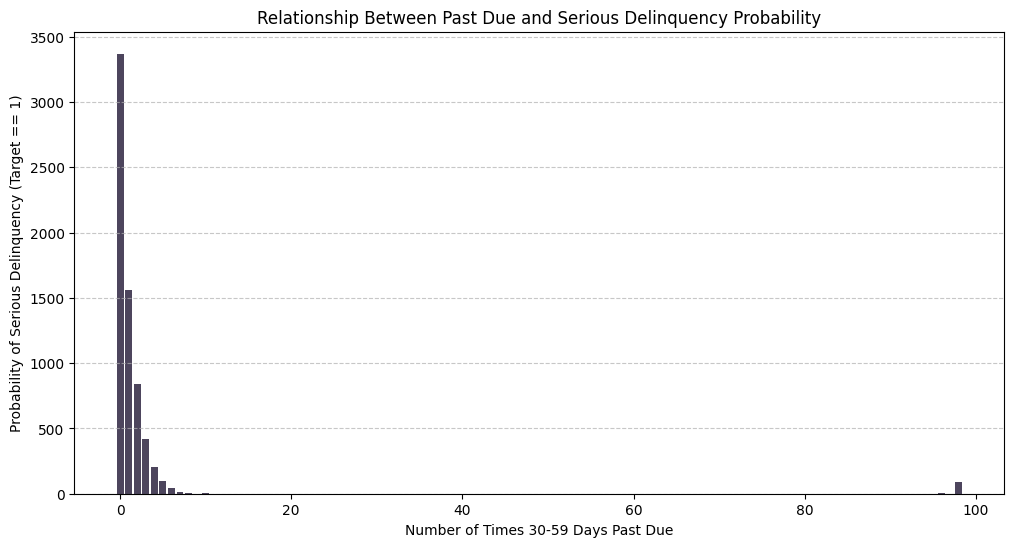

In [ ]:
# Create a bar chart to visualize the relationship
plt.figure(figsize=(12, 6))
plt.bar(probability_by_past_due_30['PastDueLess_60'], probability_by_past_due_30['Count'],color='#4D455D')
plt.xlabel('Number of Times 30-59 Days Past Due')
plt.ylabel('Probability of Serious Delinquency (Target == 1)')
plt.title('Relationship Between Past Due and Serious Delinquency Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Задание 4

Обработка выбросов

In [ ]:
#Создаем признак-маркер выбросов
df_train['Income_Outlier'] = (df_train['MonthlyIncome'] > df_train['MonthlyIncome'].quantile(0.99)).astype(int)
df_train['DebtRatio_Outlier'] = (df_train['DebtRatio'] > df_train['DebtRatio'].quantile(0.95)).astype(int)

#Обрезаем выбросы (winsorization)
df_train['MonthlyIncome'] = np.clip(df_train['MonthlyIncome'],
                                  df_train['MonthlyIncome'].quantile(0.01),
                                  df_train['MonthlyIncome'].quantile(0.99))

In [ ]:
#Удаляем нереалистичные возрасты
df_train = df_train[(df_train['Age'] >= 18) & (df_train['Age'] <= 100)]

Линеаризующие преобразования

In [ ]:
#Логарифмирование для правосторонних распределений:
df_train['Log_Income'] = np.log1p(df_train['MonthlyIncome'])
df_train['Log_DebtRatio'] = np.log1p(df_train['DebtRatio'])

<ipython-input-30-e31832d20836>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-e31832d20836>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Квадратичные признаки:
df_train['Age_Squared'] = df_train['Age']**2
df_train['Income_Squared'] = df_train['MonthlyIncome']**2

<ipython-input-31-4e555768fd06>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-4e555768fd06>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Кластеризация (KMeans)

In [ ]:
from sklearn.cluster import KMeans

# Выбираем признаки для кластеризации
cluster_features = ['Age', 'MonthlyIncome', 'DebtRatio']
X_cluster = df_train[cluster_features].dropna()

# Кластеризация
kmeans = KMeans(n_clusters=4, random_state=42)
df_train['Cluster'] = kmeans.fit_predict(X_cluster)

Полиномиальные признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df_train[['Age', 'MonthlyIncome']])
df_poly = pd.DataFrame(poly_features,
                      columns=['Age', 'MonthlyIncome', 'Age*Income'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Подготовка данных
X = pd.get_dummies(df_train.drop('Target', axis=1).dropna())
y = df_train.loc[X.index, 'Target']

# Обучение модели
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Топ-10 важных признаков
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance.head(10))

TotalBalanceDivideCreditLimits    0.137045
DebtRatio                         0.101529
Log_DebtRatio                     0.101124
PastDue90_More                    0.084780
MonthlyIncome                     0.068337
Income_Squared                    0.068064
Log_Income                        0.067642
OpenLoans                         0.067290
Age_Squared                       0.059367
Age                               0.058609
dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Наборы признаков
feature_sets = {
    'Base': ['Age', 'MonthlyIncome', 'PastDue90_More'],
    'Clusters': ['Cluster', 'PastDue90_More'],
    'Poly': ['Age', 'Log_Income', 'Age*Income', 'PastDue90_More']
}

# Оценка
for name, features in feature_sets.items():
    X = pd.get_dummies(df_train[features].dropna())
    y = df_train.loc[X.index, 'Target']
    scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5, scoring='roc_auc')
    print(f"{name}: AUC = {np.mean(scores):.3f} (±{np.std(scores):.3f})")

Base: AUC = 0.661 (±0.003)
Clusters: AUC = 0.637 (±0.005)


KeyError: "['Age*Income'] not in index"